In [1]:
import keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
model = Sequential([Dense(32, input_shape=(784,)), Activation('relu'), Dense(10), Activation('softmax'), ])

In [4]:
model

In [5]:
model.dtype

'float32'

In [6]:
# 对于具有2个类的单输入模型（二进制分类）
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 生成虚拟数据
import numpy as np
data = np.random.random((1000,100))
labels = np.random.randint(2, size=(1000,1))
print('data:', data.shape, '\nlabels:', labels.shape)

# 训练数据，以32个样本为一个batch进行迭代
model.fit(data, labels, epochs=50, batch_size=30)

data: (1000, 100) 
labels: (1000, 1)
Epoch 1/50
34/34 [==============================] - 1s 838us/step - loss: 0.7011 - accuracy: 0.4747
Epoch 2/50
34/34 [==============================] - 0s 862us/step - loss: 0.6917 - accuracy: 0.5234
Epoch 3/50
34/34 [==============================] - 0s 881us/step - loss: 0.6909 - accuracy: 0.5108
Epoch 4/50
34/34 [==============================] - 0s 697us/step - loss: 0.6870 - accuracy: 0.5489
Epoch 5/50
34/34 [==============================] - 0s 803us/step - loss: 0.6783 - accuracy: 0.5908
Epoch 6/50
34/34 [==============================] - 0s 993us/step - loss: 0.6855 - accuracy: 0.5352
Epoch 7/50
34/34 [==============================] - 0s 883us/step - loss: 0.6784 - accuracy: 0.5748
Epoch 8/50
34/34 [==============================] - 0s 882us/step - loss: 0.6754 - accuracy: 0.5898
Epoch 9/50
34/34 [==============================] - 0s 936us/step - loss: 0.6732 - accuracy: 0.5836
Epoch 10/50
34/34 [==============================] - 0s 849us/s

In [8]:
from keras.layers import Dropout
from keras.optimizers import SGD

In [39]:
# 对于具有10个类的单输入模型（多分类分类）
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=100))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 生成虚拟数据
import numpy as np
data = np.random.random((1000,100))
labels = np.random.randint(10, size=(1000,1))
print(data)
#将标签转换为十维的one-hot编码
one_hot_labels = keras.utils.to_categorical(labels, num_classes=10)
print('data:', data.shape, '\nlabels:', labels.shape)
print(model.summary())
# 训练数据，以32个样本为一个batch进行迭代
history = model.fit(data, one_hot_labels, epochs=550, batch_size=30)

[[0.32855707 0.70136807 0.95634031 ... 0.09654034 0.25590947 0.90036142]
 [0.76369721 0.30691001 0.77117923 ... 0.6919517  0.28911124 0.23715154]
 [0.27823695 0.09597128 0.73888068 ... 0.81372184 0.040698   0.58076478]
 ...
 [0.72401469 0.97449916 0.85634079 ... 0.70768842 0.95720181 0.01171801]
 [0.66677618 0.85052962 0.90511609 ... 0.85501317 0.64278016 0.51435849]
 [0.18039436 0.52750604 0.75577823 ... 0.78572408 0.9655385  0.51937494]]
data: (1000, 100) 
labels: (1000, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
Total params: 2,230
Trainable params: 2,230
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/550
34/34 [========

In [33]:
len(history.history['accuracy'])

550

In [9]:
# 生成虚拟数据
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000,1)), num_classes=10)
x_test = np.random.random((100,20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 20))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=300, batch_size=50)

score = model.evaluate(x_test, y_test, batch_size=100)
print(score)

Epoch 1/300
20/20 [==============================] - 0s 1ms/step - loss: 2.3313 - accuracy: 0.0976
Epoch 2/300
20/20 [==============================] - 0s 1ms/step - loss: 2.3136 - accuracy: 0.0992
Epoch 3/300
20/20 [==============================] - 0s 1ms/step - loss: 2.2970 - accuracy: 0.1231
Epoch 4/300
20/20 [==============================] - 0s 866us/step - loss: 2.3040 - accuracy: 0.1180
Epoch 5/300
20/20 [==============================] - 0s 965us/step - loss: 2.3017 - accuracy: 0.1252
Epoch 6/300
20/20 [==============================] - 0s 927us/step - loss: 2.2939 - accuracy: 0.1078
Epoch 7/300
20/20 [==============================] - 0s 842us/step - loss: 2.2963 - accuracy: 0.1205
Epoch 8/300
20/20 [==============================] - 0s 965us/step - loss: 2.2992 - accuracy: 0.1215
Epoch 9/300
20/20 [==============================] - 0s 839us/step - loss: 2.2887 - accuracy: 0.1488
Epoch 10/300
20/20 [==============================] - 0s 888us/step - loss: 2.2846 - accuracy: 0.

In [41]:
# 基于多层感知器的二分类

# 生成虚拟数据
x_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
x_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=10,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 0.7194 - accuracy: 0.4811
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.7123 - accuracy: 0.5138
Epoch 3/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6991 - accuracy: 0.5226
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6949 - accuracy: 0.5400
Epoch 5/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5230
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6985 - accuracy: 0.5106
Epoch 7/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6941 - accuracy: 0.5232
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6978 - accuracy: 0.5007
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5060
Epoch 10/10
1/1 [==============================] - 0s 94ms/step - loss: 0.6926 - accuracy: 0.5000


# 基于LSTM的序列分类

In [42]:
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024
print(x_train.shape)
model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#print(model.layers[0].get_weights())
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#model.summary()

model.fit(x_train, y_train, batch_size=16, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)
print(score)

(1000, 20)
Epoch 1/10
63/63 [==============================] - 2s 13ms/step - loss: 0.6992 - accuracy: 0.4923
Epoch 2/10
63/63 [==============================] - 1s 13ms/step - loss: 0.6956 - accuracy: 0.5099
Epoch 3/10
63/63 [==============================] - 1s 14ms/step - loss: 0.6959 - accuracy: 0.5275
Epoch 4/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6977 - accuracy: 0.4871
Epoch 5/10
63/63 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5391
Epoch 6/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6946 - accuracy: 0.4999
Epoch 7/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6933 - accuracy: 0.5343
Epoch 8/10
63/63 [==============================] - 1s 12ms/step - loss: 0.6963 - accuracy: 0.4437
Epoch 9/10
63/63 [==============================] - 1s 13ms/step - loss: 0.6939 - accuracy: 0.5027
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.7088 - accuracy: 0.4500
[

In [12]:
model1 = Sequential()
model1.add(Embedding(4,2,input_length=7))

model1.compile('rmsprop', 'mse')
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 7, 2)              8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [13]:
data1 = np.array([[1,2,3,1,1,1,1], [1,2,3,3,3,3,3]])
print(data1)
model1.predict(data1)

[[1 2 3 1 1 1 1]
 [1 2 3 3 3 3 3]]


array([[[ 0.01593133, -0.00334835],
        [-0.02737178,  0.03142699],
        [-0.03236508,  0.02008871],
        [ 0.01593133, -0.00334835],
        [ 0.01593133, -0.00334835],
        [ 0.01593133, -0.00334835],
        [ 0.01593133, -0.00334835]],

       [[ 0.01593133, -0.00334835],
        [-0.02737178,  0.03142699],
        [-0.03236508,  0.02008871],
        [-0.03236508,  0.02008871],
        [-0.03236508,  0.02008871],
        [-0.03236508,  0.02008871],
        [-0.03236508,  0.02008871]]], dtype=float32)

# 基于栈式LSTM的序列分类

In [14]:
data_dim = 16
timesteps = 8
num_classes = 10

# 期望输入数据的尺寸：(batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, data_dim)))# 返回维度为32的向量序列
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 生成虚拟数据
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# 生成虚拟验证数据
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
16/16 [==============================] - 6s 118ms/step - loss: 11.9171 - accuracy: 0.1029 - val_loss: 13.9478 - val_accuracy: 0.1300
Epoch 2/5
16/16 [==============================] - 0s 11ms/step - loss: 14.1246 - accuracy: 0.0918 - val_loss: 14.6030 - val_accuracy: 0.1300
Epoch 3/5
16/16 [==============================] - 0s 11ms/step - loss: 14.5550 - accuracy: 0.0907 - val_loss: 14.7804 - val_accuracy: 0.1300
Epoch 4/5
16/16 [==============================] - 0s 11ms/step - loss: 14.7454 - accuracy: 0.0893 - val_loss: 14.8271 - val_accuracy: 0.1300
Epoch 5/5
16/16 [==============================] - 0s 11ms/step - loss: 14.6812 - accuracy: 0.0933 - val_loss: 14.8577 - val_accuracy: 0.1300


# keras函数式API

In [15]:

# 全连接网络

from keras.layers import Input
from keras.models import Model

# 这部分返回一个张量
inputs = Input(shape=(784, ))

# 层的实例是可调用的，它以张量为参数，并返回一个张量
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# 这部分创建了一个包含输入层和三个全连接层的模型
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#print(type(data), labels)
data = np.random.random((1000, 784))
labels = np.random.random((1000, 10))
model.fit(data, labels, epochs=10, batch_size=20)

Epoch 1/10
50/50 [==============================] - 0s 841us/step - loss: 43.1719 - accuracy: 0.1138
Epoch 2/10
50/50 [==============================] - 0s 880us/step - loss: 183.6869 - accuracy: 0.0906
Epoch 3/10
50/50 [==============================] - 0s 851us/step - loss: 299.9474 - accuracy: 0.1032
Epoch 4/10
50/50 [==============================] - 0s 863us/step - loss: 443.2224 - accuracy: 0.1135
Epoch 5/10
50/50 [==============================] - 0s 887us/step - loss: 542.0868 - accuracy: 0.1172
Epoch 6/10
50/50 [==============================] - 0s 1ms/step - loss: 562.3103 - accuracy: 0.0901
Epoch 7/10
50/50 [==============================] - 0s 1ms/step - loss: 476.6397 - accuracy: 0.0899
Epoch 8/10
50/50 [==============================] - 0s 938us/step - loss: 348.5947 - accuracy: 0.0994
Epoch 9/10
50/50 [==============================] - 0s 1ms/step - loss: 471.8204 - accuracy: 0.1117
Epoch 10/10
50/50 [==============================] - 0s 1ms/step - loss: 571.7608 - accur

In [16]:
model.save('./test.hdf5')

In [17]:
model.to_json()

'{"class_name": "Functional", "config": {"name": "model", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_1"}, "name": "input_1", "inbound_nodes": []}, {"class_name": "Dense", "config": {"name": "dense_14", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "name": "dense_14", "inbound_nodes": [[["input_1", 0, 0, {}]]]}, {"class_name": "Dense", "config": {"name": "dense_15", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"cla

In [18]:
#模型的保存和加载
model.save('./111.h5')
from keras.models import load_model
model = load_model('./111.h5')

# keras模型的一些方法
model.layers#包含模型网络层的展平列表
model.inputs#模型输入张量的列表
model.outputs#模型输出张量的列表
model.summary()#打印模型概述信息
model.get_config()#返回包含模型配置信息的字典。通过下面的代码，可以根据配置信息重新实例化模型
config = model.get_config()
model = Model.from_config(config)
# 或者对于Sequential
model = Sequential.from_config(config)

model.get_weights()#返回模型中所有张量的列表，类型为Numpy数组
model.set_weights(weights)#从numpy数组中为模型设置权重，列表中的数组必须与get_weights()返回的权重具有想通的尺寸。
model.to_json()#以JSON字符串的形式返回模型的表示。

#使用以下方式从JSON字符串重新实例化模型
from keras.models import model_from_json

m_json = model.to_json()
model = model_from_json(m_json)

model.to_yaml()#以YAML字符串形式返回模型的表示。注意，该表示不包括权重，只包括结构。

#以下方式通过YAML重新实例化模型，使用重新初始化的权重
from keras.models import model_from_yaml
m_yaml = model.to_yaml()
model = model_from_yaml(m_yaml)

model.save_weights('filepath')#将模型权重存储为HDF5文件
model.load_weights('filepath', by_name=False)#从HDF5文件（由save_weights创建）中加载权重。默认下，模型结构不变。如果想加载进不同结构的模型，可以使用参数by_name=True，加载同名层的权重。

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


NameError: name 'weights' is not defined

# Day2

In [ ]:
from tensorflow import keras

# 多输入多输出模型
函数式API使处理大量交织的数据流变得容易
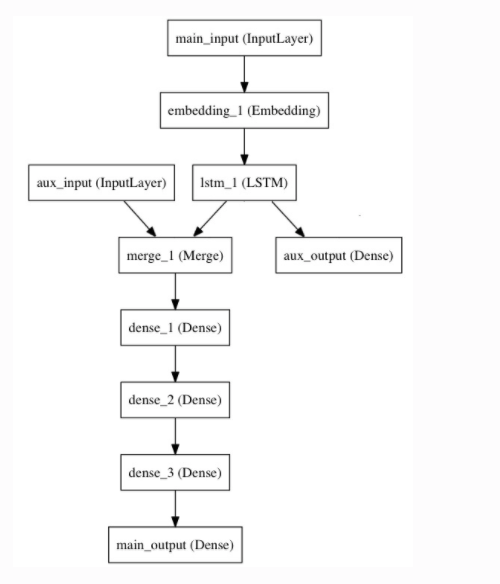

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

# 标题输入：接受一个含有100个整数的序列，每个整数在1到10000之间
# 注意我们可以通过传递一个“name”参数来命名任何层
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# Embedding层将输入序列编码为一个稠密向量的序列，每个向量维度为512
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM层把向量序列转换成单个向量，它包含整个序列的上下文信息
lstm_out = LSTM(32)(x)

# 在这里，我们插入辅助损失，使得即使在模型主损失很高的情况下，LSTM层和Embedding层都能被平稳地训练
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

# 此时，我们将辅助输入数据与LSTM层的输出链接起来，输入到模型中：
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# 堆叠多个全连接网络层
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# 最后添加主要的逻辑回归层
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [ ]:
#然后定义一个具有两个输入和两个输出的模型
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

# 现在编译模型，给辅助损失分配0.2的权重，如果要为不同的输出指定不同的loss_weights或loss，可以使用列表或字典，
# 这里我们给loss参数传递单个损失函数，将这个损失用于所有的输出
model.compile(optimizer='rmsprop', loss='binary_crossentropy', loss_weights=[1., 0.2])

In [ ]:
model.fit([headline_data, additional_data], [labels, labels], epochs=50, batch_size=32)

# 由于我们通过name参数为输入、输出层进行了命名，所以可通过一下方式进行训练
model.compile(optimizer='rmsprop',
                loss={'main_input': 'binary_crossentropy', 'aux_input': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2}
             )

model.fit({'main_input': headline_data, 'auxiliary_input': additional_data}, 
          {'main_output': labels, 'auxiliary_output': labels}, 
          epochs=50,
          batch_size=32
         )


# 模型的一些常用的方法

In [ ]:
model.layers # 包含模型网络层的展平列表
model.inputs # 模型输入张量的列表
model.outputs # 模型输出张量的列表
model.summary() # 打印模型概述信息
model.get_config() # 返回包含模型配置信息的字典

# Keras网络层
网络层（layer）有很多共同的函数

In [ ]:
layer = Dense(32)

weights = layer.get_weights()  # 以含有Numpy矩阵的列表形式返回层的权重
layer.set_weights(weights) # 从含有Numpy举证的列表中设置层的权重

config = layer.get_config() # 返回包含层配置的字典
reconstructed_layer = Dense.from_config(config)

# 或者如下
from tensorflow.keras import layers

config = layer.get_config()
layer = layers.deserialize({'class_name': layer.__class__.__name__, 'config': config})

In [ ]:
layer.input

In [ ]:
model.input

In [ ]:
model.summary()

# keras的循环层RNN

In [1]:
keras.layers.RNN(cell, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)

NameError: name 'keras' is not defined

# LSTM

In [2]:
keras.layers.LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)


NameError: name 'keras' is not defined

# Embedding层

In [ ]:
keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)


In [8]:
# example
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

model = Sequential()
model.add(Embedding(1000, 64, input_length=10))
# 模型将输入一个大小为（batch，input_length）的整数矩阵
# 输入中最大的整数（即此索引）不应该大于999（词汇表大小）
# 现在model.output_shape == (None, 10, 64)，其中None是batch的维度，一个batch代表一个样本

# 可以理解为1000个样本，每个样本是由32句话构成，每句话是10个词。
input_array = np.random.randint(1000, size=(32,10))


model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
# 输出的形状是（32，10，64）32句话构成一个样本，每句10个词，每个词变成了64维的向量
assert output_array.shape == (32, 10, 64)

# 融合层
该部分内容讲述的都是两个张量之间的融合，一个实现融合的层
## Add
keras.layers.Add()

计算输入张量列表的和

它接受一个张量的列表，所有的张量必须有相同的输入尺寸，然后返回一个张量（和输入张量尺寸相同）。

In [9]:
from  tensorflow import keras

input1 = keras.layers.Input(shape=(16,))
x1 = keras.layers.Dense(8, activation='relu')(input1)
input2 = keras.layers.Input(shape=(32,))
x2 = keras.layers.Dense(8, activation='relu')(input2)
# 相当于 added = keras.layers.add([x1, x2])
added = keras.layers.Add()([x1, x2])

out = keras.layers.Dense(4)(added)
model = keras.models.Model(inputs=[input1, input2], outputs=out)

## Dot
keras.layers.Dot(axes, normalize=False)

计算两个张量之间样本的点积